dependencies

In [30]:
import imblearn.over_sampling as over
import imblearn.under_sampling as under
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

importing data

In [71]:
data = pd.read_csv("data/processed.csv", header=None)

data.columns = data.iloc[0]
data = data.iloc[1:]

data = data.apply(pd.to_numeric)
print(data.columns)
print(data.shape)
data.head()

Index(['Age', 'Education', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore',
       'Impulsive', 'SS', 'country_Canada', 'country_New_Zealand',
       'country_Other', 'country_Republic_of_Ireland', 'country_UK',
       'country_USA', 'country_Australia', 'gender_F', 'gender_M', 'eth_Black',
       'eth_Mixed-Black/Asian', 'eth_Mixed-White/Asian',
       'eth_Mixed-White/Black', 'eth_Other', 'eth_White', 'eth_Asian',
       'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'VSA'],
      dtype='object', name=0)
(1876, 43)


0  Age  Education    Nscore    Escore    Oscore    AScore    Cscore  \
1    2          9  0.413474  0.796106  0.762567  0.609827  0.479394   
2    3          5  0.444788  0.622976  0.392939  0.266061  0.353580   
3    1          8  0.492045  0.376883  0.527023  0.585213  0.584415   
4    3          9  0.623275  0.250544  0.456995  0.456454  0.688508   
5    6          4  0.413474  0.454133  0.278311  0.794386  0.735380   

0  Impulsive        SS  country_Canada  ...  Crack  Ecstasy  Heroin  Ketamine  \
1   0.337920  0.465658               0  ...      0        2       0         1   
2   0.215401  0.619957               0  ...      0        0       0         0   
3   0.215401  0.224398               0  ...      0        0       0         1   
4   0.428474  0.465658               0  ...      0        0       0         0   
5   0.215401  0.132468               1  ...      0        0       0         0   

0  Legalh  LSD  Meth  Mushrooms  Nicotine  VSA  
1       0    1     1          0         2    0  
2       0    0     0          0         0    0  
3       0    0     0          0         1    0  
4       0    0     0          1         1    0  
5       0    0     0          0         2    0  

[5 rows x 43 columns]

In [72]:
X = data.iloc[:,0:24]
Y = data.iloc[:,25:]

print(X.shape)
print(Y.shape)

(1876, 24)
(1876, 18)


plotting functions

In [86]:
# plotting original data, always in 'before' slot
def plot_before_scatter(subplot, drug, var1, var2):
    counts = Y[drug].value_counts().sort_index()

    sb.scatterplot(
        x=X[var1],
        y=X[var2],
        hue=Y[drug],

        alpha=0.4,
        ax=subplot[0],
        palette={0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}
    )

    subplot[0].set_title(
        f"Before\nNot at Risk: {counts.get(0, 0)}, Potential Risk: {counts.get(1, 0)}, High Risk: {counts.get(2, 0)}"
    )

    # Custom legend labels
    label_map = {0: 'Not at Risk', 1: 'Potential Risk', 2: 'High Risk'}
    handles, labels = subplot[0].get_legend_handles_labels()
    new_labels = [label_map[int(l)] if l.isdigit() else l for l in labels]
    subplot[0].legend(handles, new_labels, title='Risk Level')


In [98]:
# plotting comparison after transformation
def plot(X, drug, resampler, title, var1, var2):

  X_new, y_new = resampler.fit_resample(X, Y[drug])

  X_new = pd.DataFrame(X_new, columns=X.columns)
  y_new = pd.Series(y_new)

  counts_new = y_new.value_counts().sort_index()

  fig, axes = plt.subplots(1, 2, figsize=(16,6))

  plot_before_scatter(axes, drug, var1, var2)

  sb.scatterplot(
      x=X_new[var1],
      y=X_new[var2], 
      hue=y_new, 
      
      alpha=0.4, 
      ax=axes[1],
      palette={0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}
  )

  counts_new = y_new.value_counts().sort_index()
  axes[1].set_title(
        f"{title}\nNot at Risk: {counts_new.get(0, 0)}, Potential Risk: {counts_new.get(1, 0)}, High Risk: {counts_new.get(2, 0)}"
    )
  
  # Custom legend labels
  label_map = {0: 'Not at Risk', 1: 'Potential Risk', 2: 'High Risk'}
  handles, labels = axes[1].get_legend_handles_labels()
  new_labels = [label_map[int(l)] if l.isdigit() else l for l in labels]
  axes[1].legend(handles, new_labels, title='Risk Level')

  plt.tight_layout()

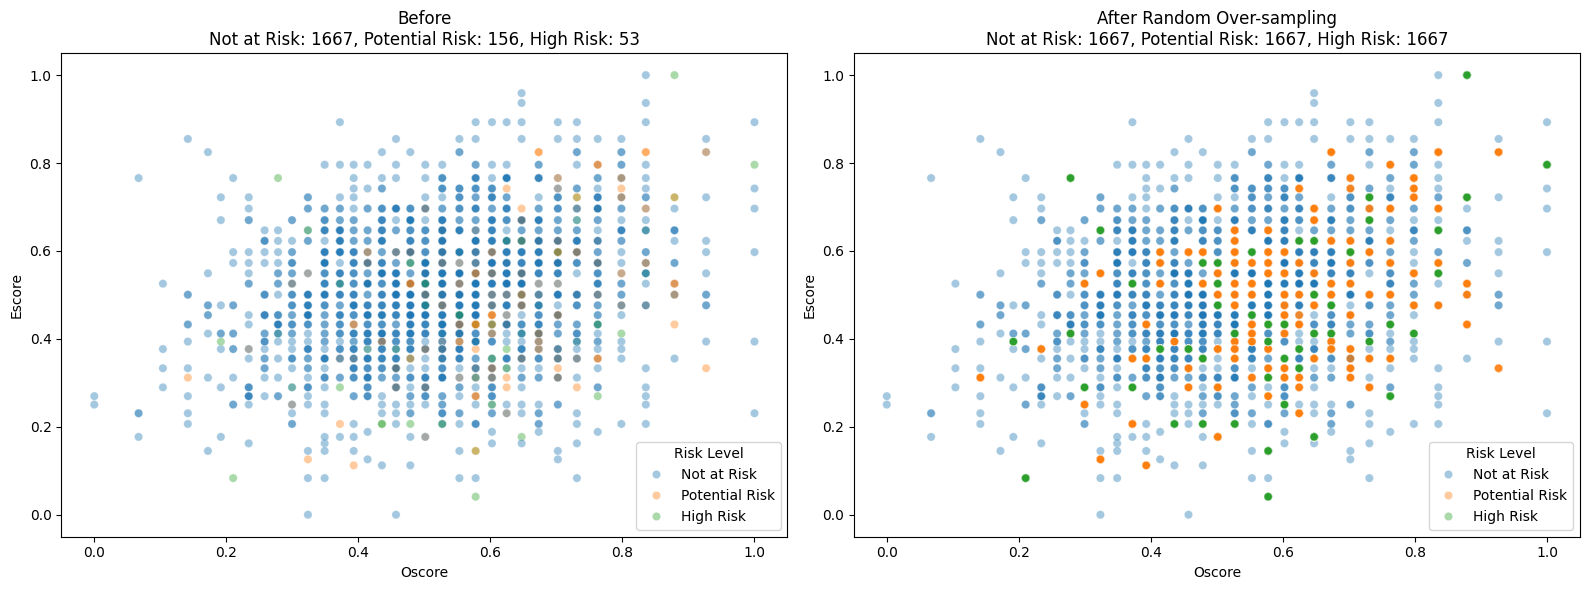

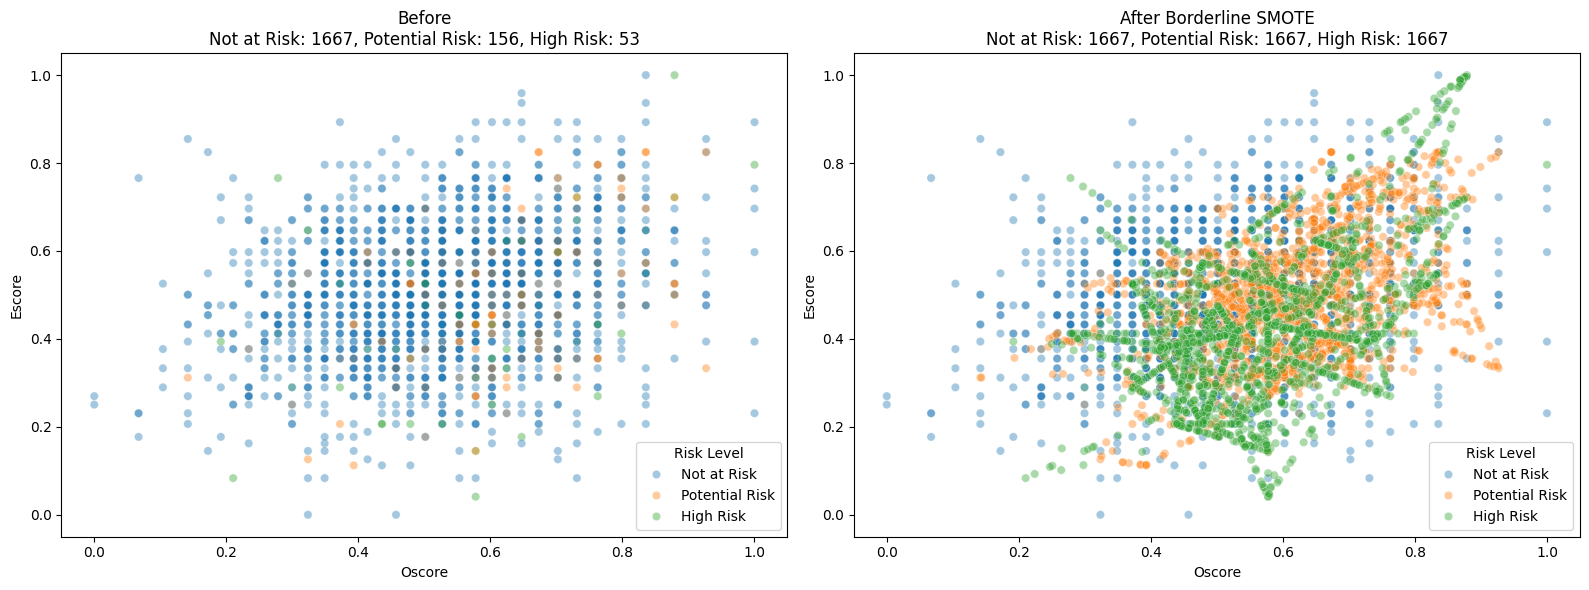

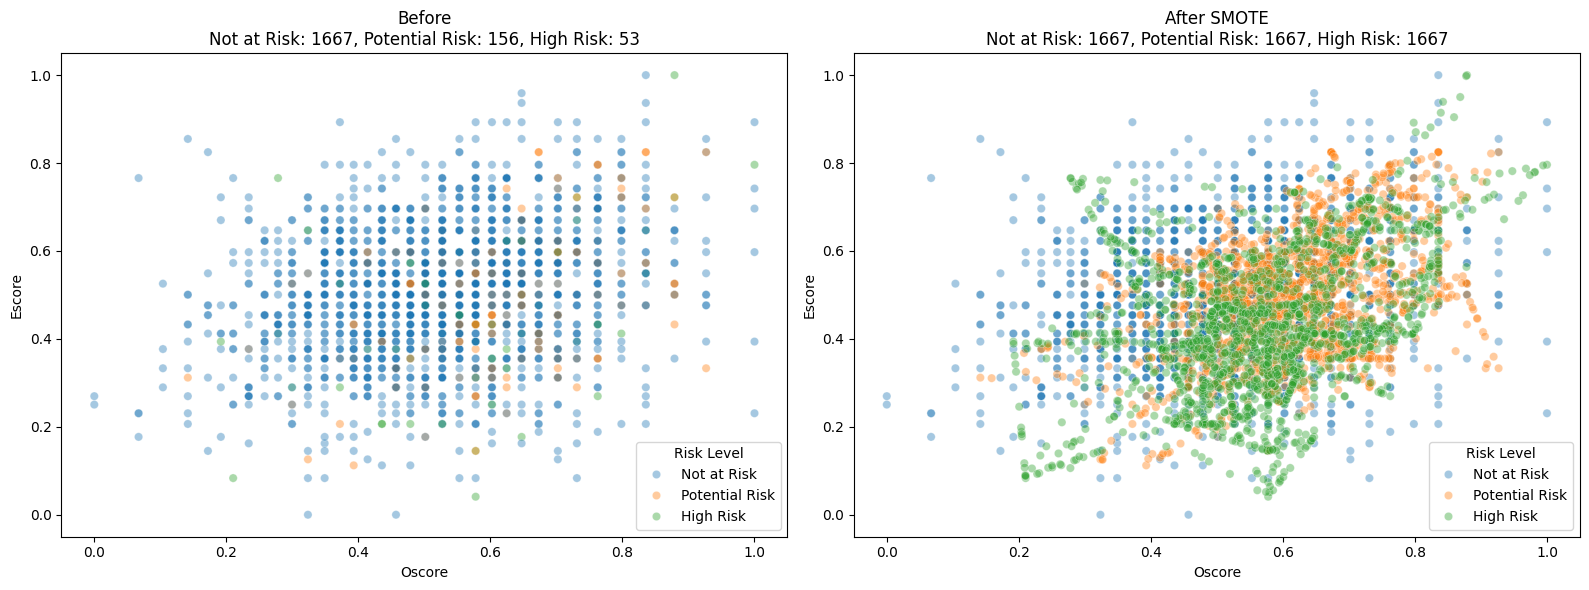

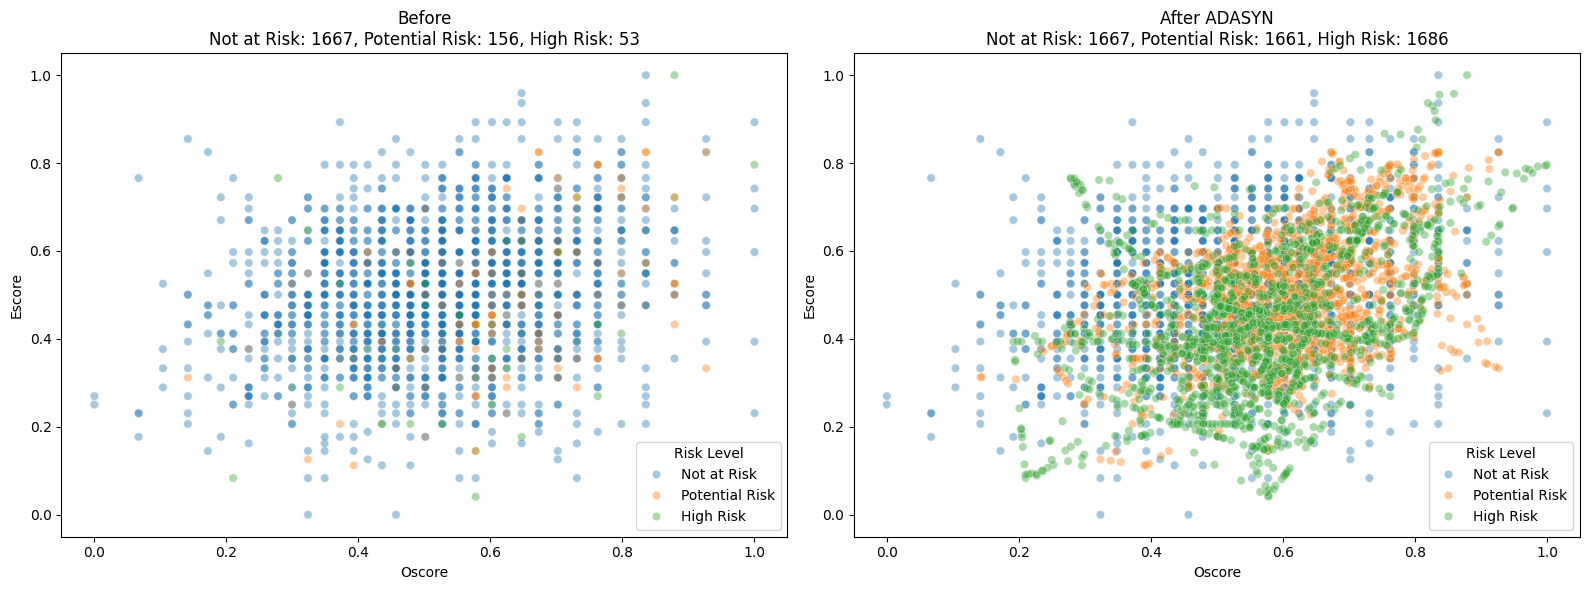

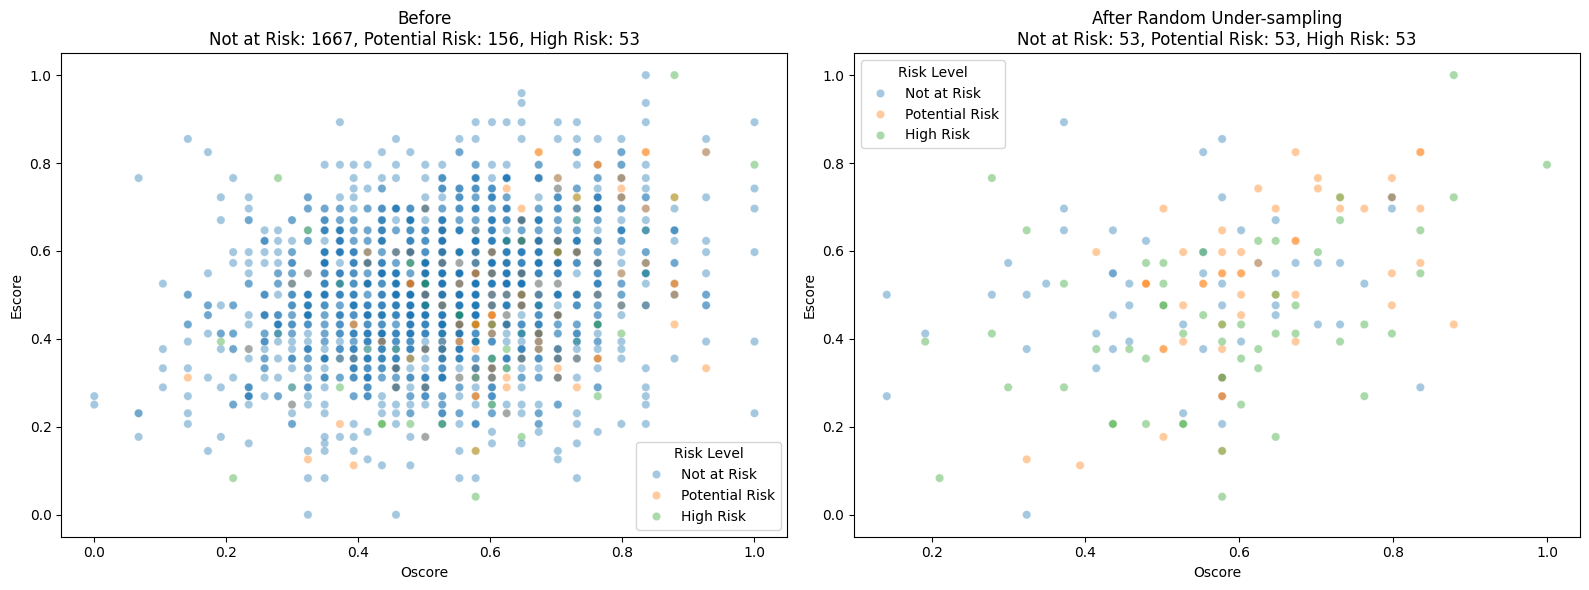

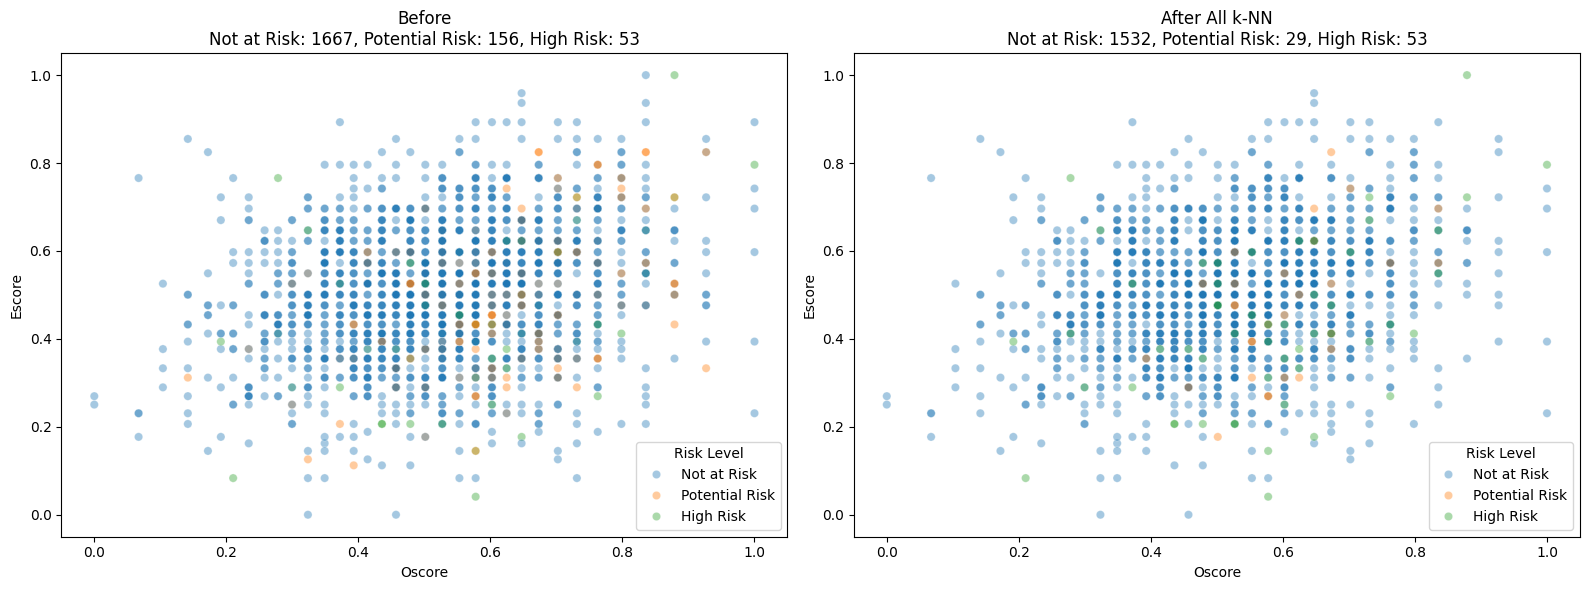

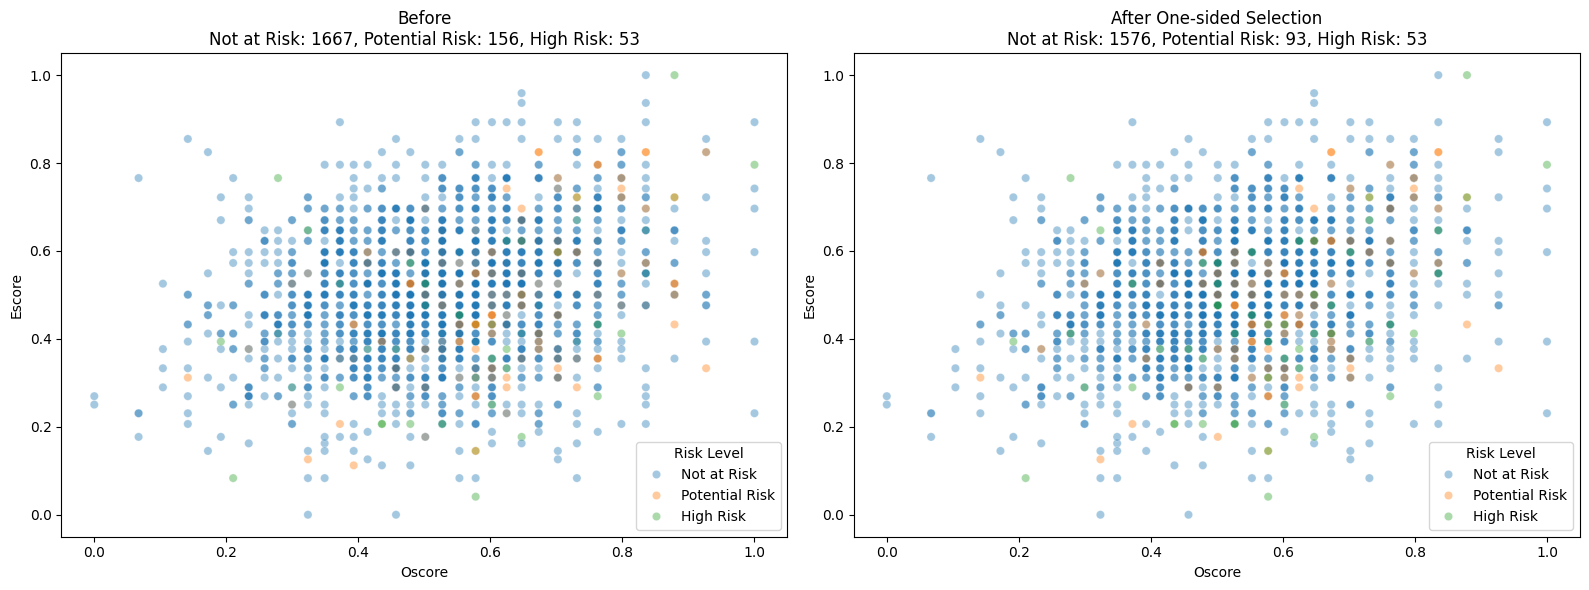

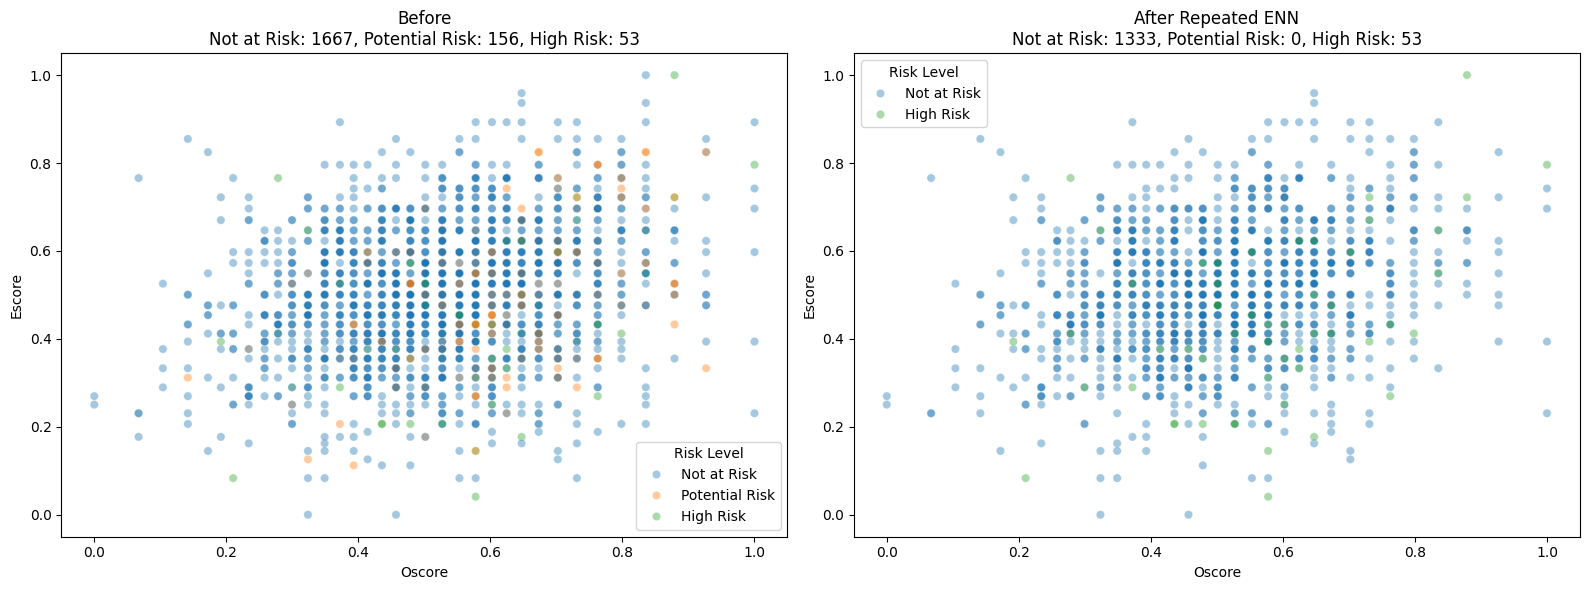

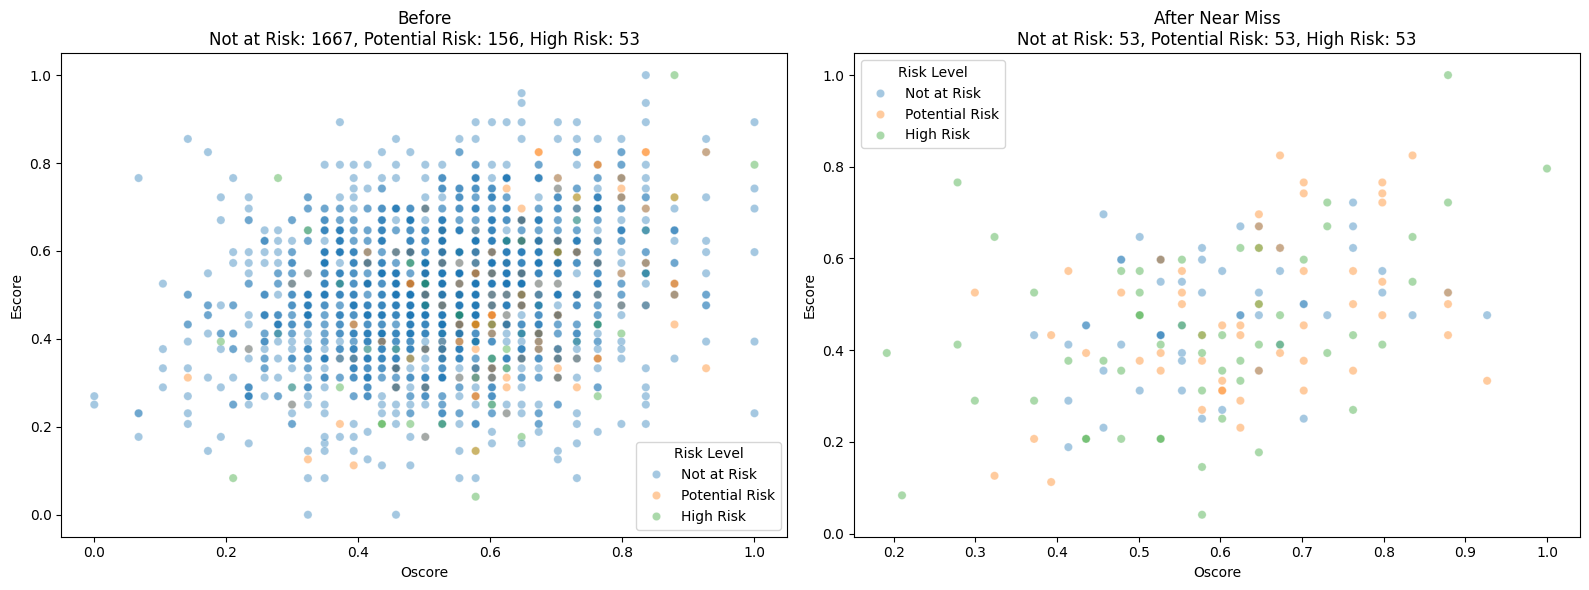

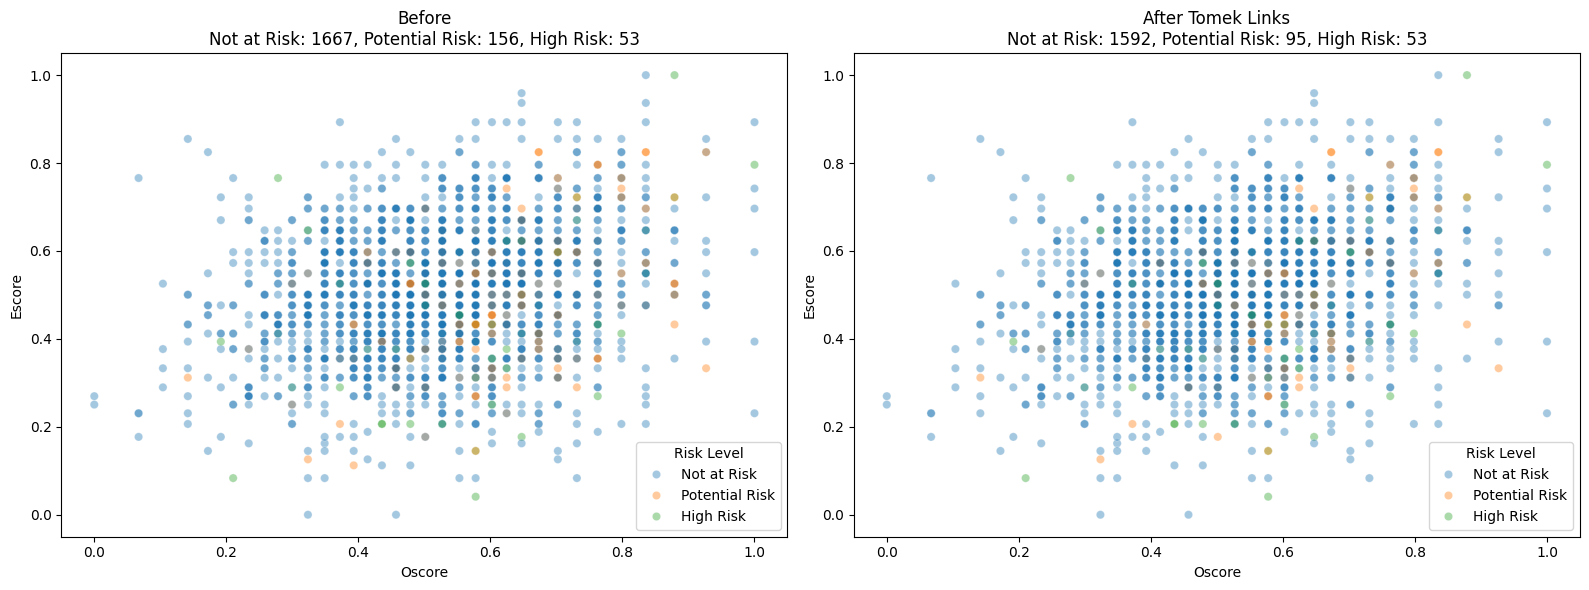

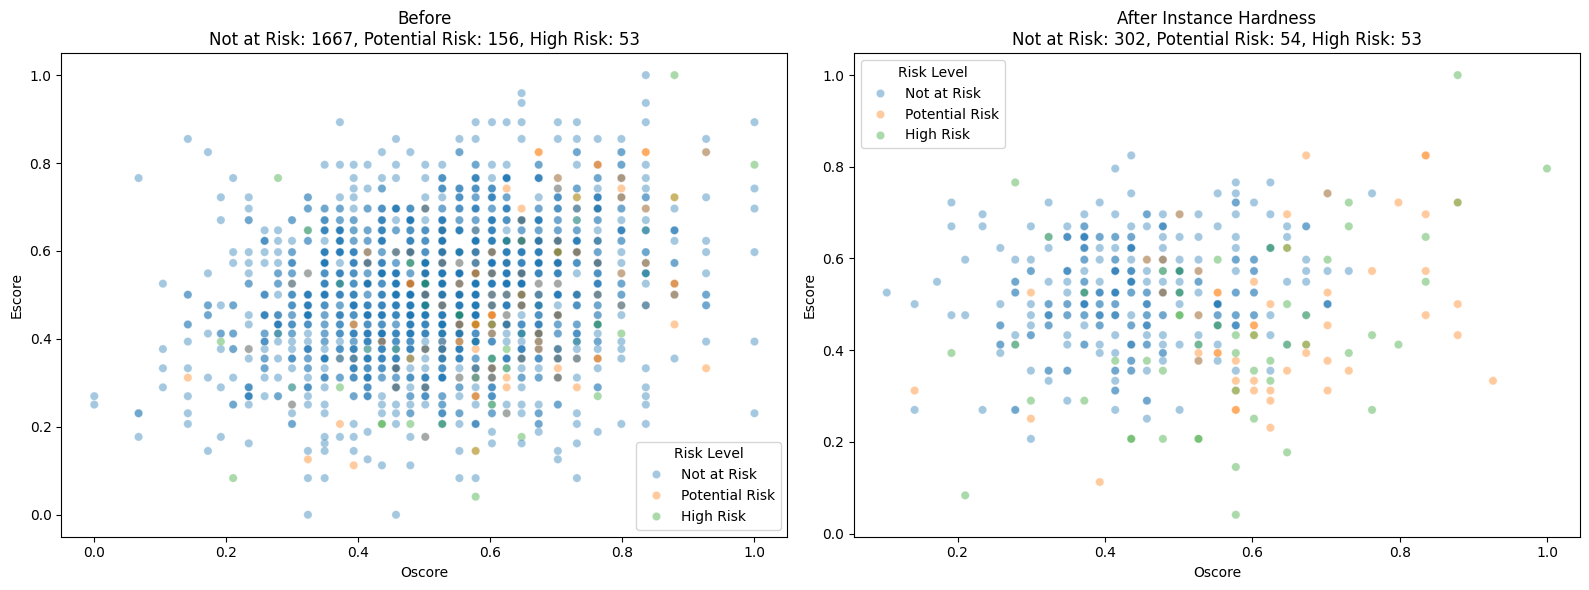

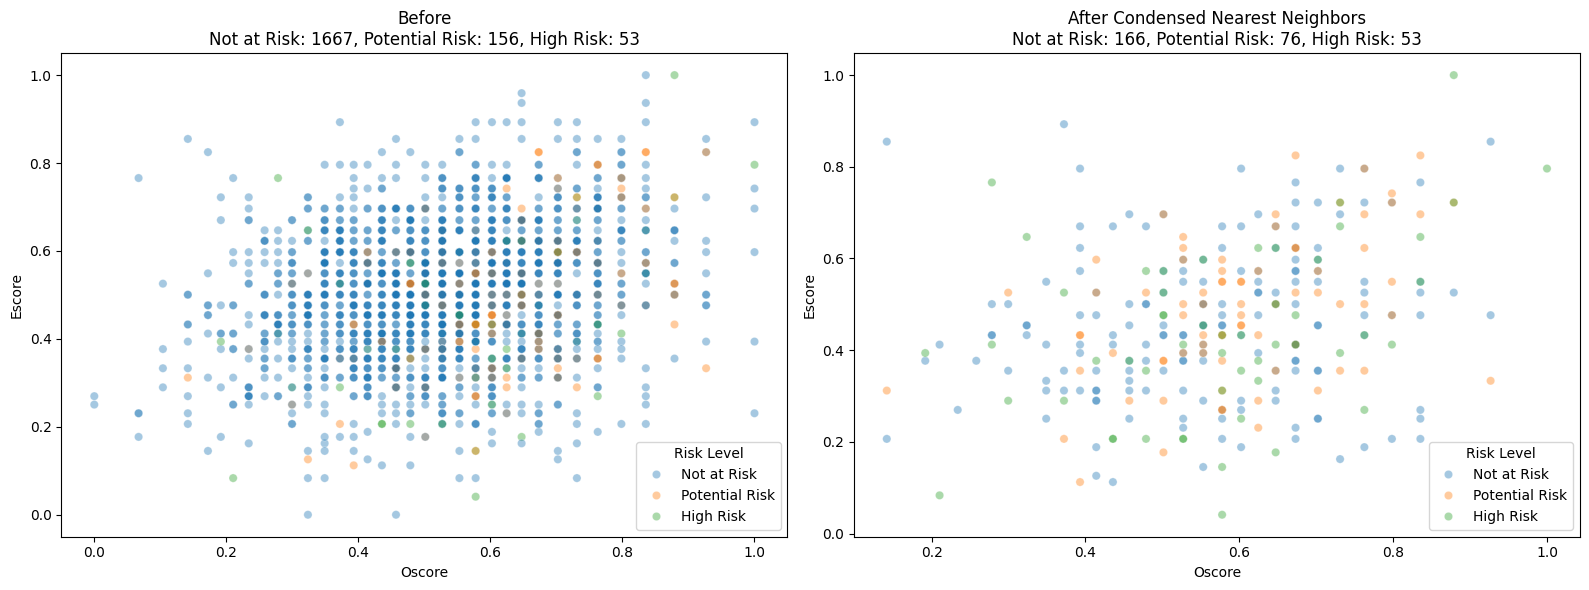

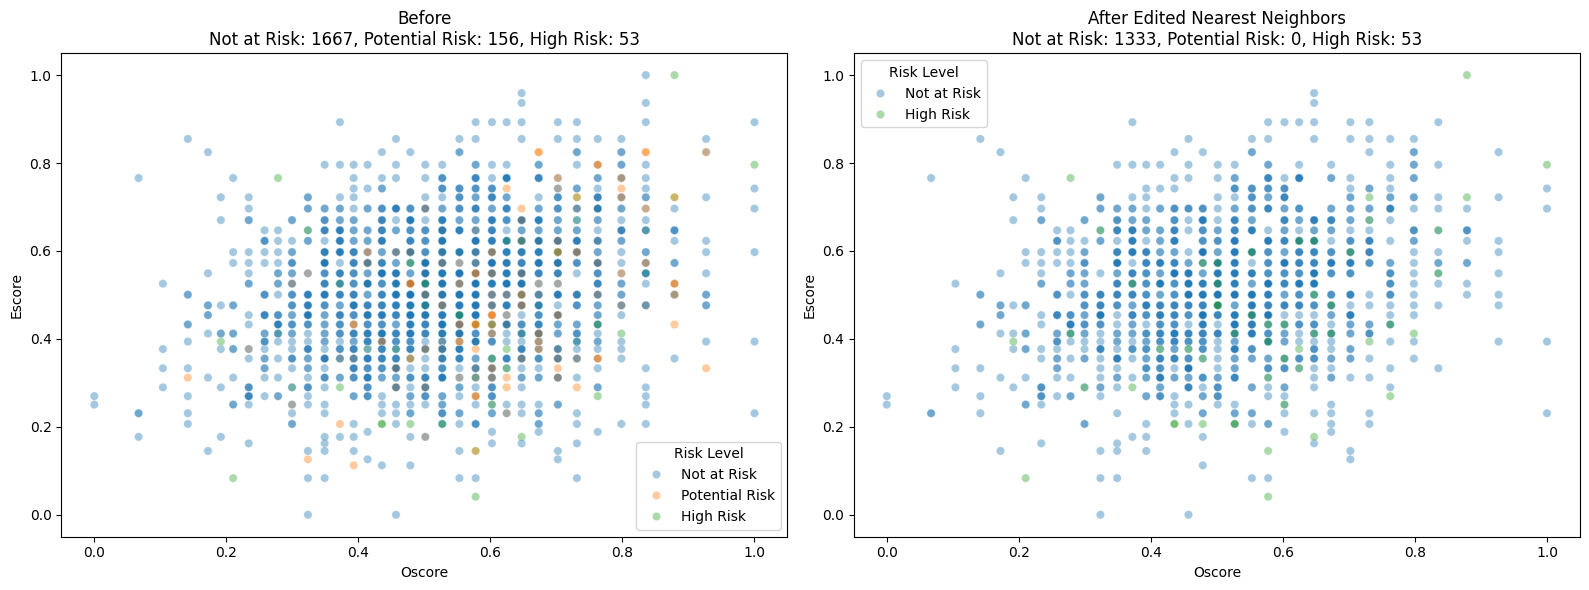

In [100]:
drug = "Heroin"
var1 = "Oscore"
var2 = "Escore"
# oversampling
plot(X, drug, over.RandomOverSampler(), "After Random Over-sampling", var1, var2)
plot(X, drug, over.BorderlineSMOTE(), "After Borderline SMOTE", var1, var2)
plot(X, drug, over.SMOTE(), "After SMOTE", var1, var2)
plot(X, drug, over.ADASYN(), "After ADASYN", var1, var2)


# undersampling
plot(X, drug, under.RandomUnderSampler(), "After Random Under-sampling", var1, var2)
plot(X, drug, under.AllKNN(), "After All k-NN", var1, var2)
plot(X, drug, under.OneSidedSelection(), "After One-sided Selection", var1, var2)
plot(X, drug, under.RepeatedEditedNearestNeighbours(), "After Repeated ENN", var1, var2)
plot(X, drug, under.NearMiss(), "After Near Miss", var1, var2)
plot(X, drug, under.TomekLinks(), "After Tomek Links", var1, var2)
plot(X, drug, under.InstanceHardnessThreshold(), "After Instance Hardness", var1, var2)
plot(X, drug, under.CondensedNearestNeighbour(), "After Condensed Nearest Neighbors", var1, var2)
plot(X, drug, under.EditedNearestNeighbours(), "After Edited Nearest Neighbors", var1, var2)